<a href="https://colab.research.google.com/github/Surichn/DSAI/blob/main/DS/TA/NLP/NLP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate \
      https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
      -o /tmp/headlines.json

In [3]:
import pandas as pd

data = pd.read_json("./x1.json")
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


Segregating Headlines 

In [5]:
headlines = list(data['headline'])

labels = list(data['is_sarcastic'])

Set the Parameters

In [6]:
vocab_size = 5000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

Splitting into Training and Testing

In [7]:
  training_sentences = headlines[0:training_size]
  testing_sentences = headlines[training_size:]

  training_labels = labels[0:training_size]
  testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_pad = pad_sequences(training_sequences,maxlen = max_length, padding=padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_pad = pad_sequences(testing_sequences,maxlen = max_length, padding=padding_type, truncating = trunc_type)

In [9]:
training_pad = np.array(training_pad)
training_labels = np.array(training_labels)
testing_pad = np.array(testing_pad)
testing_labels = np.array(testing_labels)

Define neural network with following layers


*   Embedding Layer
*   Global Average Pooling Layer (1D)
*   Dense Layer with 24 nodes
*   Output Dense Layer  with sigmoid activation

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation = 'relu'),
                             tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           80000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 80,433
Trainable params: 80,433
Non-trainable params: 0
_________________________________________________________________


Train the Model

In [11]:
num_epochs = 30

history = model.fit(
    training_pad,
    training_labels,
    epochs = num_epochs,
    validation_data = (testing_pad, testing_labels),
    verbose = 2
)

Epoch 1/30
625/625 - 4s - loss: 0.6650 - accuracy: 0.6123 - val_loss: 0.5557 - val_accuracy: 0.7814 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 4s - loss: 0.4359 - accuracy: 0.8211 - val_loss: 0.3829 - val_accuracy: 0.8323 - 4s/epoch - 7ms/step
Epoch 3/30
625/625 - 4s - loss: 0.3387 - accuracy: 0.8579 - val_loss: 0.3617 - val_accuracy: 0.8409 - 4s/epoch - 6ms/step
Epoch 4/30
625/625 - 4s - loss: 0.2992 - accuracy: 0.8760 - val_loss: 0.3476 - val_accuracy: 0.8484 - 4s/epoch - 6ms/step
Epoch 5/30
625/625 - 4s - loss: 0.2732 - accuracy: 0.8874 - val_loss: 0.3397 - val_accuracy: 0.8537 - 4s/epoch - 7ms/step
Epoch 6/30
625/625 - 4s - loss: 0.2532 - accuracy: 0.8987 - val_loss: 0.3430 - val_accuracy: 0.8507 - 4s/epoch - 7ms/step
Epoch 7/30
625/625 - 4s - loss: 0.2395 - accuracy: 0.9026 - val_loss: 0.3614 - val_accuracy: 0.8459 - 4s/epoch - 6ms/step
Epoch 8/30
625/625 - 4s - loss: 0.2270 - accuracy: 0.9100 - val_loss: 0.3627 - val_accuracy: 0.8450 - 4s/epoch - 6ms/step
Epoch 9/30
625/625 - 2s 

Visualize the train and validation accuracy

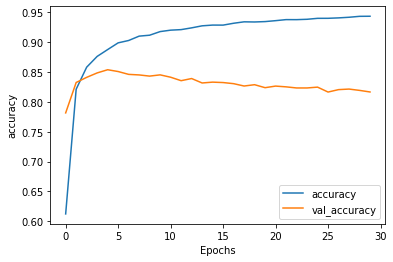

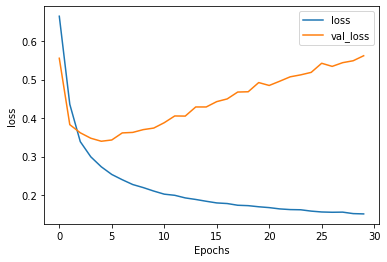

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' +string])
  plt.legend([string, 'val_' +string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")


Classifying new sentence

In [16]:
sentence = ["the baby boy fears spiders", "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
pad_seq = pad_sequences(sequences,maxlen = max_length,padding = padding_type, truncating = trunc_type)

print(model.predict(pad_seq))

[[0.00477034]
 [0.01057258]]
